# Momentum Strategies

# 2. Investigating Momentum

## Data

In this section, we empirically investigate some concerns regarding AQR's new momentum product. On Canvas, find the data file, `data/momentum_data.xlsx`.

* The first tab contains the momentum factor as an excess return: $r^{\text{mom}}$.
* The second tab contains returns on portfolios corresponding to scored momentum deciles.
    * $r^{\text{mom}(1)}$ denotes the portfolio of stocks in the lowest momentum decile, the "losers" with the lowest past returns.
    * $r^{\text{mom}(10)}$ denotes the portfolio of stocks in the highest momentum decile.
* The third tab gives portfolios sorted by momentum and size.
    * $r^{\text{momsu}}$ denotes the portfolio of small stocks in the top 3 deciles of momentum scores.
    * $r^{\text{momBD}}$ denotes the portfolio of big-stocks in the bottom 3 deciles of momentum scores.

Note that the Fama-French momentum return, $\tilde{r}^{\text{mom,FF}}$, given in the first tab, is constructed by FF as,

$$\tilde{r}^{\text{mom,FF}} = \frac{1}{2}(r^{\text{momBU}} + r^{\text{momSU}}) - \frac{1}{2}(r^{\text{momBD}} + r^{\text{momSD}})$$

The Fama-French momentum return

$$\tilde{r}^{mom,FF} = \frac{1}{2}(\tilde{r}^{momBU} + \tilde{r}^{momSU}) - \frac{1}{2}(\tilde{r}^{momBD} + \tilde{r}^{momSD})$$

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
factor_rets = pd.read_excel('data/momentum_data.xlsx', sheet_name='factors (excess returns)').set_index('Date')
MKT_rets = factor_rets['MKT']
SMB_rets = factor_rets['SMB']
HML_rets = factor_rets['HML']

UMD_rets_df = pd.read_excel('data/momentum_data.xlsx', sheet_name='momentum (excess returns)').set_index('Date')
mom_rets = UMD_rets_df['UMD']

deciles_rets = pd.read_excel('data/momentum_data.xlsx', sheet_name='deciles (total returns)').set_index('Date')
size_sorts_rets = pd.read_excel('data/momentum_data.xlsx', sheet_name='size_sorts (total returns)').set_index('Date')

risk_free_df = pd.read_excel('data/momentum_data.xlsx', sheet_name='risk-free rate').set_index('Date')
r_f = risk_free_df['RF'] 

FREQ = 12  # Monthly data

## 2.1 
### Is Momentum still profitable?

The excess returns of lucrative trading strategies often disappear once the strategy is well-known. The first widely-cited paper on momentum was published in 1993. Have momentum returns or risk changed since then? The AQR case takes place at the end of 2008. Have momentum returns changed in 2009-2024?

Investigate by filling out the summary statistics below for the full-sample and three sub-samples.

### (a)

Using the data provided, fill in Table 1 with the appropriate stats for $\tilde{r}^{\text{mom,FF}}$.

In [43]:
def calculate_statistics(rets):
    mean = rets.mean() * FREQ
    vol = rets.std() * (FREQ ** 0.5)
    sharpe = mean / vol
    skew = rets.skew()
    corr_to_mkt = rets.corr(MKT_rets.loc[rets.index])
    corr_to_value = rets.corr(HML_rets.loc[rets.index])
    
    stats = {
        'Mean': mean,
        'Volatility': vol,
        'Sharpe Ratio': sharpe,
        'Skewness': skew,
        'Corr to MKT': corr_to_mkt,
        'Corr to HML': corr_to_value
    }
    return stats

In [44]:
results = {}
results['1927 - 2024'] = calculate_statistics(mom_rets[:'2024-12-31'])
results['1927 - 1993'] = calculate_statistics(mom_rets.loc[:'1993-12-31'])
results['1993 - 2008'] = calculate_statistics(mom_rets.loc['1994-01-01':'2008-12-31'])
results['2009 - 2024'] = calculate_statistics(mom_rets.loc['2009-01-01':'2024-12-31'])
results_df = pd.DataFrame(results).T
display(results_df.style.format("{:.2%}"))


,Mean,Volatility,Sharpe Ratio,Skewness,Corr to MKT,Corr to HML
1927 - 2024,7.39%,16.27%,45.40%,-306.73%,-34.92%,-40.98%
1927 - 1993,8.81%,16.05%,54.91%,-391.10%,-36.75%,-50.10%
1993 - 2008,10.27%,17.54%,58.58%,-59.64%,-24.02%,-11.98%
2009 - 2024,-1.29%,15.80%,-8.16%,-269.16%,-37.02%,-31.90%



### (b)

Has momentum changed much over time, as seen through these subsample statistics?

Until 2008 the strategy performance was pretty stable. The mean returns were pretty strong between 1927 and 2008 (around 8-10%) but has since then been slightly negative since 2009. The volatility has been very similar between the periods and the same can be said of the correlation to the market. However the Skewness and correlation to the value factor have changed slightly, especially in the period from 1994 - 2008 but overall just solid.

### (c)

Does this data support AQR’s argument that momentum is an important piece of the ideal portfolio? What if mean returns to momentum are in actuality near zero due to transaction costs - would there still be evidence here that momentum is valuable?

Yes definitely. The strategy was very profitable when AQR was analysing this product in 2008. The correlation is negative to the market and to value factor so the momentum factor can be a valuable diversifier to ones portfolio. So even if the mean is near zero the factor can increase the investable universe through diversification.

## 2.2
### Whether a long-only implementation of momentum is valuable.
Whether a long-only implementation of momentum is valuable.

Construct your own long-only implementation:

$$\tilde{r}^{momU,FF} = \frac{1}{2}(\tilde{r}^{momBU} + \tilde{r}^{momSU}) - r^f$$

Note that this is following the FF approach of treating big and small stocks separately. This would be very similar to a scaled version of,

$$\tilde{r}^{momU} = \frac{1}{3}(\tilde{r}^{mom(8)} + \tilde{r}^{mom(9)} + \tilde{r}^{mom(10)}) - r^f$$

For the question below, use the FF-style $\tilde{r}_t^{momU,FF}$

### (a)

Fill out Table 2 for the data in the period 1994-2024.

In [45]:
# Constructing long-only momentum strategy
momU_FF_rets = 0.5 * (size_sorts_rets['BIG HiPRIOR'] + size_sorts_rets['SMALL HiPRIOR']) - r_f

In [58]:
stats = {}
stats['long_and_short_stats'] = calculate_statistics(mom_rets['1994-01-01':'2024-12-31'])
stats['long_only_stats'] = calculate_statistics(momU_FF_rets['1994-01-01':'2024-12-31'])
stats_df = pd.DataFrame(stats).T
display(stats_df.style.format("{:.2%}"))

,Mean,Volatility,Sharpe Ratio,Skewness,Corr to MKT,Corr to HML
long_and_short_stats,4.31%,16.72%,25.75%,-146.10%,-31.05%,-21.04%
long_only_stats,11.61%,17.80%,65.24%,-44.20%,90.40%,-11.63%


### (b)

Is long-only momentum as attractive as long-short momentum with respect to mean, volatil-ity, and Sharpe Ratio?

The long-only factor has performed much better then the long-short factor so it looks much more attractive given its high Mean and Sharpe ratio.

### (c)

Is long-only momentum as diversifying as long-short momentum with respect to market and value premia?

No the correlation between the lond-only portlolio and the market is 93.6%, which is super high. The reason for this is that long only portfolio is much more exposed to market risk than the long-short portfolio.

### (d)

Show a plot of the cumulative product of $1 + \tilde{r}^{\text{mom,FF}}$ and $1 + \tilde{r}^{\text{momU,FF}}$ over the 1994-2024 subsample.

Text(0, 0.5, 'Cumulative Return')

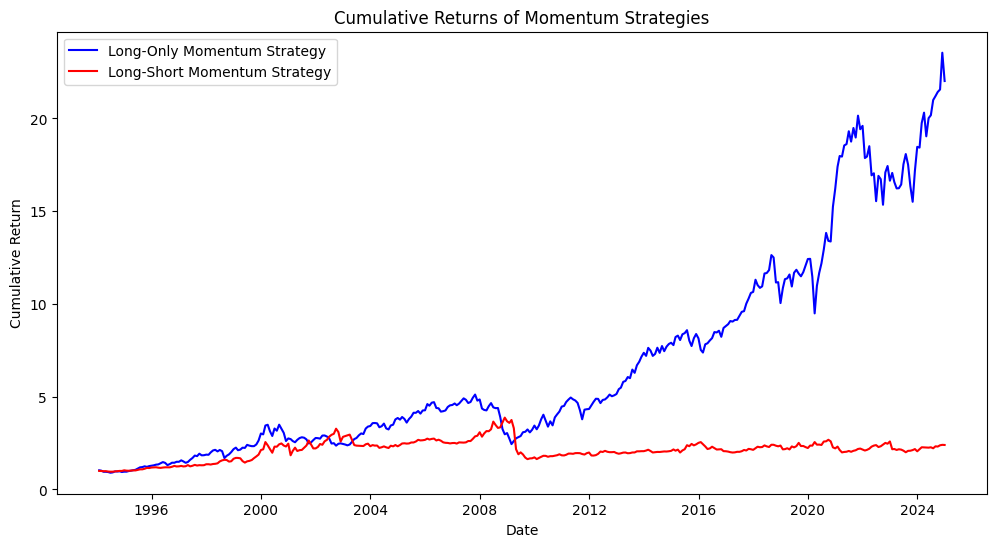

In [47]:
long_only_prices = (1 + momU_FF_rets['1994-01-01':'2024-12-31']).cumprod()
long_short_prices = (1 + mom_rets['1994-01-01':'2024-12-31']).cumprod()
plt.figure(figsize=(12, 6))
plt.plot(long_only_prices, label='Long-Only Momentum Strategy', color='blue')
plt.plot(long_short_prices, label='Long-Short Momentum Strategy', color='red')
plt.legend()
plt.title('Cumulative Returns of Momentum Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

## 2.3. Is momentum just data mining, or is it a robust strategy?

Assess how sensitive the threshold for the "winners" and "losers" is in the results. Specifically, we compare three constructions:

* long the top 1 decile and short the bottom 1 deciles:

$$\tilde{r}^{momD1} = r^{mom(10)} - r^{mom(1)}$$

* long the top 3 deciles and short the bottom 3 deciles:

$$\tilde{r}^{momD3} = \frac{1}{3}(r^{mom(8)} + r^{mom(9)} + r^{mom(10)}) - \frac{1}{3}(r^{mom(3)} + r^{mom(2)} + r^{mom(1)})$$

$$= \frac{1}{3}\sum_{k=8}^{10} r^{mom(k)} - \frac{1}{3}\sum_{k=1}^{3} r^{mom(k)}$$

* long the top 5 deciles and short the bottom 5 decile:

$$\tilde{r}^{momD5} = \frac{1}{5}\sum_{k=6}^{10} r^{mom(k)} - \frac{1}{5}\sum_{k=1}^{5} r^{mom(k)}$$

### (a)

Compare all three constructions, (in the full-sample period,) by filling out the stats in the table below for the period 1994-2025.

In [48]:
mom_D1_rets = deciles_rets['Hi PRIOR'] - deciles_rets['Lo PRIOR']
mom_D3_rets = 1 / 3 * (deciles_rets['PRIOR 8'] + deciles_rets['PRIOR 9'] + deciles_rets['Hi PRIOR']) - 1 / 3 * (deciles_rets['Lo PRIOR'] + deciles_rets['PRIOR 2'] + deciles_rets['PRIOR 3'])
MOM_D5_rets = 1 / 5 * (deciles_rets['PRIOR 6'] + deciles_rets['PRIOR 7'] + deciles_rets['PRIOR 8'] + deciles_rets['PRIOR 9'] + deciles_rets['Hi PRIOR']) - 1 / 5 * (deciles_rets['Lo PRIOR'] + deciles_rets['PRIOR 2'] + deciles_rets['PRIOR 3'] + deciles_rets['PRIOR 4'] + deciles_rets['PRIOR 5'])

In [56]:
moments_stats = {}
moments_stats['mom_D1'] = calculate_statistics(mom_D1_rets['1994-01-01':'2025-12-31'])
moments_stats['mom_D3'] = calculate_statistics(mom_D3_rets['1994-01-01':'2025-12-31'])
moments_stats['mom_D5'] = calculate_statistics(MOM_D5_rets['1994-01-01':'2025-12-31'])
moments_stats_df = pd.DataFrame(moments_stats).T
display(moments_stats_df.style.format("{:.1%}"))

,Mean,Volatility,Sharpe Ratio,Skewness,Corr to MKT,Corr to HML
mom_D1,7.4%,29.9%,24.8%,-127.1%,-32.0%,-24.6%
mom_D3,2.7%,19.3%,13.9%,-132.0%,-35.4%,-22.1%
mom_D5,1.6%,13.4%,11.6%,-140.8%,-34.9%,-21.4%


### (b)
Do the tradeoffs between the 1-decile, 3-decile, and 5-decile constructions line up with the theoretical tradeoffs we discussed in the lecture?

Yes, the mean is much higher where the threshold is higher but the volatility is also higer. 

### (c)

Should AQR’s retail product consider using a 1-decile or 5-decile construction?

Based on the data AQR should consider using the 1-decile because it has higher mean and sharpe ratio.

### (d)

Does $\tilde{r}^{momD3}$ have similar stats to the Fama-French construction in (1). Recall that construction is also a 3-decile, long-short construction, but it is segmented for small and large stocks. Compare the middle row of Table 3 with the top row of Table 2.

Fama and Frence has a bit higher mean return and slightly lower volatility but other than that they are very much alike. The reason for the difference is likely because Fama-French construction has 50% in small stocks and 50% in big stocks whereas D3 could be biased in either direction.